In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv('IMDb Movies India.csv', encoding='latin')

In [54]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [55]:
df.shape

(15509, 10)

In [56]:
df.nunique()

Name        13838
Year          102
Duration      182
Genre         485
Rating         84
Votes        2034
Director     5938
Actor 1      4718
Actor 2      4891
Actor 3      4820
dtype: int64

In [57]:
#missing values
df.isnull().sum().values.sum()

33523

In [58]:
#value count of actors, directors and genre
df['Genre'].value_counts()

Drama                         2780
Action                        1289
Thriller                       779
Romance                        708
Drama, Romance                 524
                              ... 
Action, Musical, War             1
Horror, Crime, Thriller          1
Animation, Comedy                1
Romance, Action, Crime           1
Adventure, Fantasy, Sci-Fi       1
Name: Genre, Length: 485, dtype: int64

In [59]:
df['Director'].value_counts()

Jayant Desai        58
Kanti Shah          57
Babubhai Mistry     50
Mahesh Bhatt        48
Master Bhagwan      47
                    ..
Naeem Siddiqui       1
Shadaab Khan         1
Mystelle Brabbee     1
Kunal Shivdasani     1
Kiran Thej           1
Name: Director, Length: 5938, dtype: int64

In [60]:
df['Actor 1'].value_counts()

Ashok Kumar           158
Dharmendra            140
Jeetendra             140
Mithun Chakraborty    133
Amitabh Bachchan      129
                     ... 
Vatsal Sheth            1
Ujala Baboria           1
Dimple Sewak            1
Komal Leels             1
Sangeeta Tiwari         1
Name: Actor 1, Length: 4718, dtype: int64

In [61]:
#to predict movie ratings on features, we need to remove null values that directly influence results
df.dropna(subset=['Year','Name','Duration','Votes','Rating'],inplace = True)
df.isnull().sum()

Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     163
dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5851 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5851 non-null   object 
 1   Year      5851 non-null   object 
 2   Duration  5851 non-null   object 
 3   Genre     5820 non-null   object 
 4   Rating    5851 non-null   float64
 5   Votes     5851 non-null   object 
 6   Director  5850 non-null   object 
 7   Actor 1   5776 non-null   object 
 8   Actor 2   5734 non-null   object 
 9   Actor 3   5688 non-null   object 
dtypes: float64(1), object(9)
memory usage: 502.8+ KB


In [63]:
#drop missing values in Genre column
df.dropna(subset=['Genre'], inplace=True)

In [64]:
genres=df['Genre'].str.split(',',expand=True)
genres.head()

,0,1,2
1,Drama,None,None
3,Comedy,Romance,None
5,Comedy,Drama,Musical
6,Drama,Romance,War
8,Horror,Mystery,Thriller


In [65]:
genre_Count= {}
for genre in genres.values.flatten():
    if genre is not None:
        if genre in genre_Count:
            genre_Count[genre] += 1
        else:
            genre_Count[genre] = 1
            
genreCount ={genre: count for genre, count in sorted(genre_Count.items())}
for genre, count in genreCount.items():
    print(f"{genre}: {count}")

 Action: 38
 Adventure: 179
 Biography: 42
 Comedy: 357
 Crime: 606
 Drama: 1972
 Family: 371
 Fantasy: 117
 History: 94
 Horror: 76
 Music: 52
 Musical: 326
 Mystery: 247
 News: 2
 Romance: 1223
 Sci-Fi: 30
 Sport: 42
 Thriller: 592
 War: 31
 Western: 2
Action: 1661
Adventure: 105
Animation: 56
Biography: 84
Comedy: 995
Crime: 272
Documentary: 130
Drama: 1875
Family: 57
Fantasy: 31
History: 9
Horror: 129
Music: 3
Musical: 90
Mystery: 61
Romance: 160
Sci-Fi: 5
Sport: 2
Thriller: 92
War: 3


In [66]:
genrePie = df['Genre'].value_counts()
genrePie.head(5)

Drama                   870
Drama, Romance          334
Action, Crime, Drama    329
Action, Drama           207
Comedy, Drama           206
Name: Genre, dtype: int64

In [67]:
df.isnull().sum()

Name          0
Year          0
Duration      0
Genre         0
Rating        0
Votes         0
Director      1
Actor 1      74
Actor 2     115
Actor 3     161
dtype: int64

In [68]:
df.dropna(subset=['Director'], inplace=True)

In [69]:
actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']]).dropna().value_counts()
actors.head(5)

Mithun Chakraborty    160
Amitabh Bachchan      148
Dharmendra            146
Ashok Kumar           124
Akshay Kumar          120
dtype: int64

In [70]:
df.isnull().sum()

Name          0
Year          0
Duration      0
Genre         0
Rating        0
Votes         0
Director      0
Actor 1      73
Actor 2     114
Actor 3     160
dtype: int64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5819 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5819 non-null   object 
 1   Year      5819 non-null   object 
 2   Duration  5819 non-null   object 
 3   Genre     5819 non-null   object 
 4   Rating    5819 non-null   float64
 5   Votes     5819 non-null   object 
 6   Director  5819 non-null   object 
 7   Actor 1   5746 non-null   object 
 8   Actor 2   5705 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 500.1+ KB


In [72]:
df.dropna(subset =['Actor 1', 'Actor 2', 'Actor 3'], inplace=True)

In [73]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [74]:
#to extract number part from duration and convert to float
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(float)

In [75]:
# assuming year has value like '[2015]'
df['Year'] = df['Year'].str.extract(r'(\d+)').astype(float)

In [76]:
#convert year column to integer datatype
df['Year']=df['Year'].astype(int)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int32  
 2   Duration  5659 non-null   float64
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(2), int32(1), object(7)
memory usage: 464.2+ KB


In [78]:
#replace non-numeric values and convert to float
df['Votes']=df['Votes'].str.replace('[$,M]','', regex=True).astype(float)

print(df['Votes'].dtype)
print(df['Votes'].count())

float64
5659


In [79]:
df['Votes'].info()

<class 'pandas.core.series.Series'>
Int64Index: 5659 entries, 1 to 15508
Series name: Votes
Non-Null Count  Dtype  
--------------  -----  
5659 non-null   float64
dtypes: float64(1)
memory usage: 88.4 KB


Text(0.5, 1.0, 'Annual Movie Release Counts Over Time')

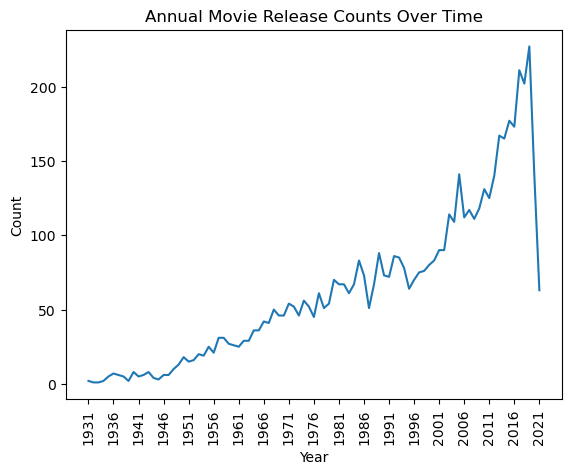

In [80]:
#create line plot of movie ratings
ax = sns.lineplot(data=df['Year'].value_counts().sort_index())
positions = range(min(df['Year']), max(df['Year']) +1, 5)
ax.set_xticks(positions)
ax.set_xticklabels(positions, rotation = 90)
ax.set_xlabel("Year")
ax.set_ylabel("Count")
ax.set_title("Annual Movie Release Counts Over Time")

([<matplotlib.patches.Wedge at 0x14df6497250>,
 [Text(0.20441841004072792, 1.0808390785109598, 'Drama'),
  Text(-1.084045428697809, -0.1866695168456377, 'Drama, Romance'),
  Text(-0.3423193334354444, -1.0453791053758026, 'Action, Crime, Drama'),
  Text(0.5850170752470585, -0.9315336932550415, 'Action, Drama'),
  Text(1.0384417350194313, -0.3628205658033097, 'Comedy, Drama')])

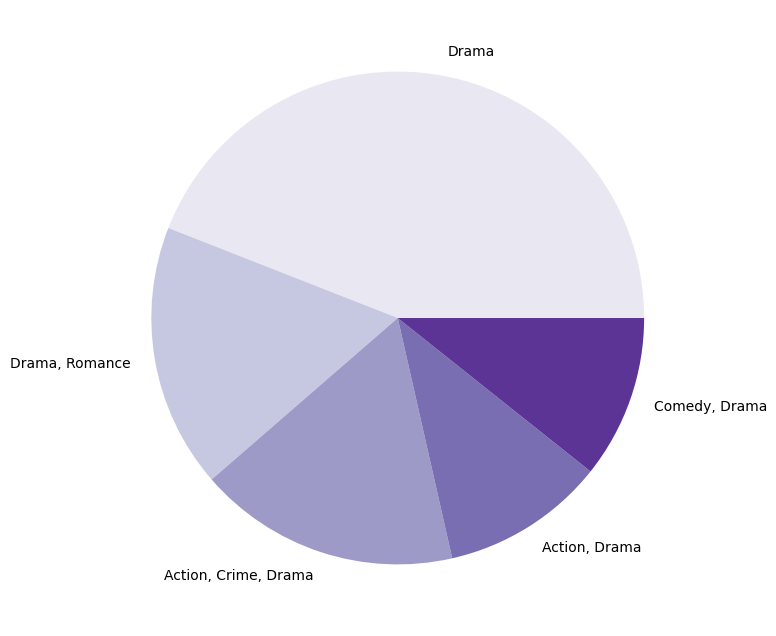

In [81]:
#count frequency of each genre and select top 5
genre_counts=df['Genre'].value_counts().head(5)

palette = sns.color_palette("Purples", n_colors=5)

#create pie chart of top 5 genre
plt.figure(figsize=(8,8))
plt.pie(genre_counts, labels=genre_counts.index, colors = palette)


In [82]:
#import word cloud library to create Word Cloud of genres
from wordcloud import WordCloud

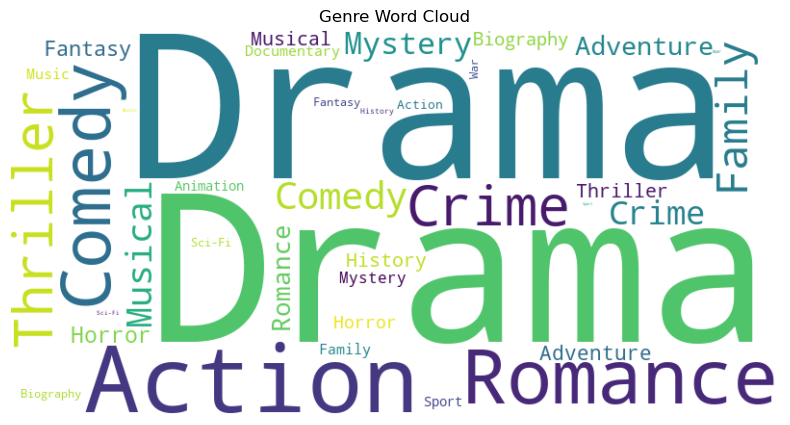

In [83]:
genre_counts = df['Genre'].str.split(',', expand=True).stack().value_counts()

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_counts)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Genre Word Cloud')
plt.show()

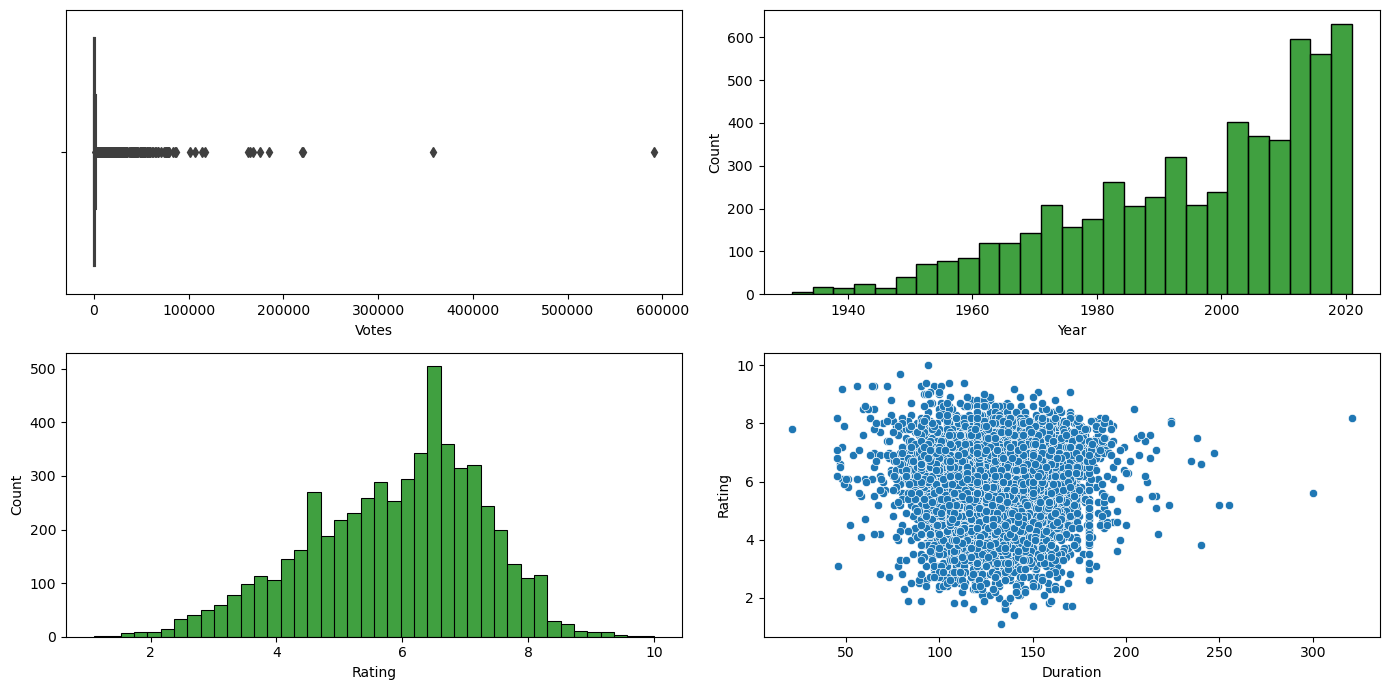

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Duration'}>],
       [<Axes: title={'center': 'Rating'}>,
        <Axes: title={'center': 'Votes'}>]], dtype=object)

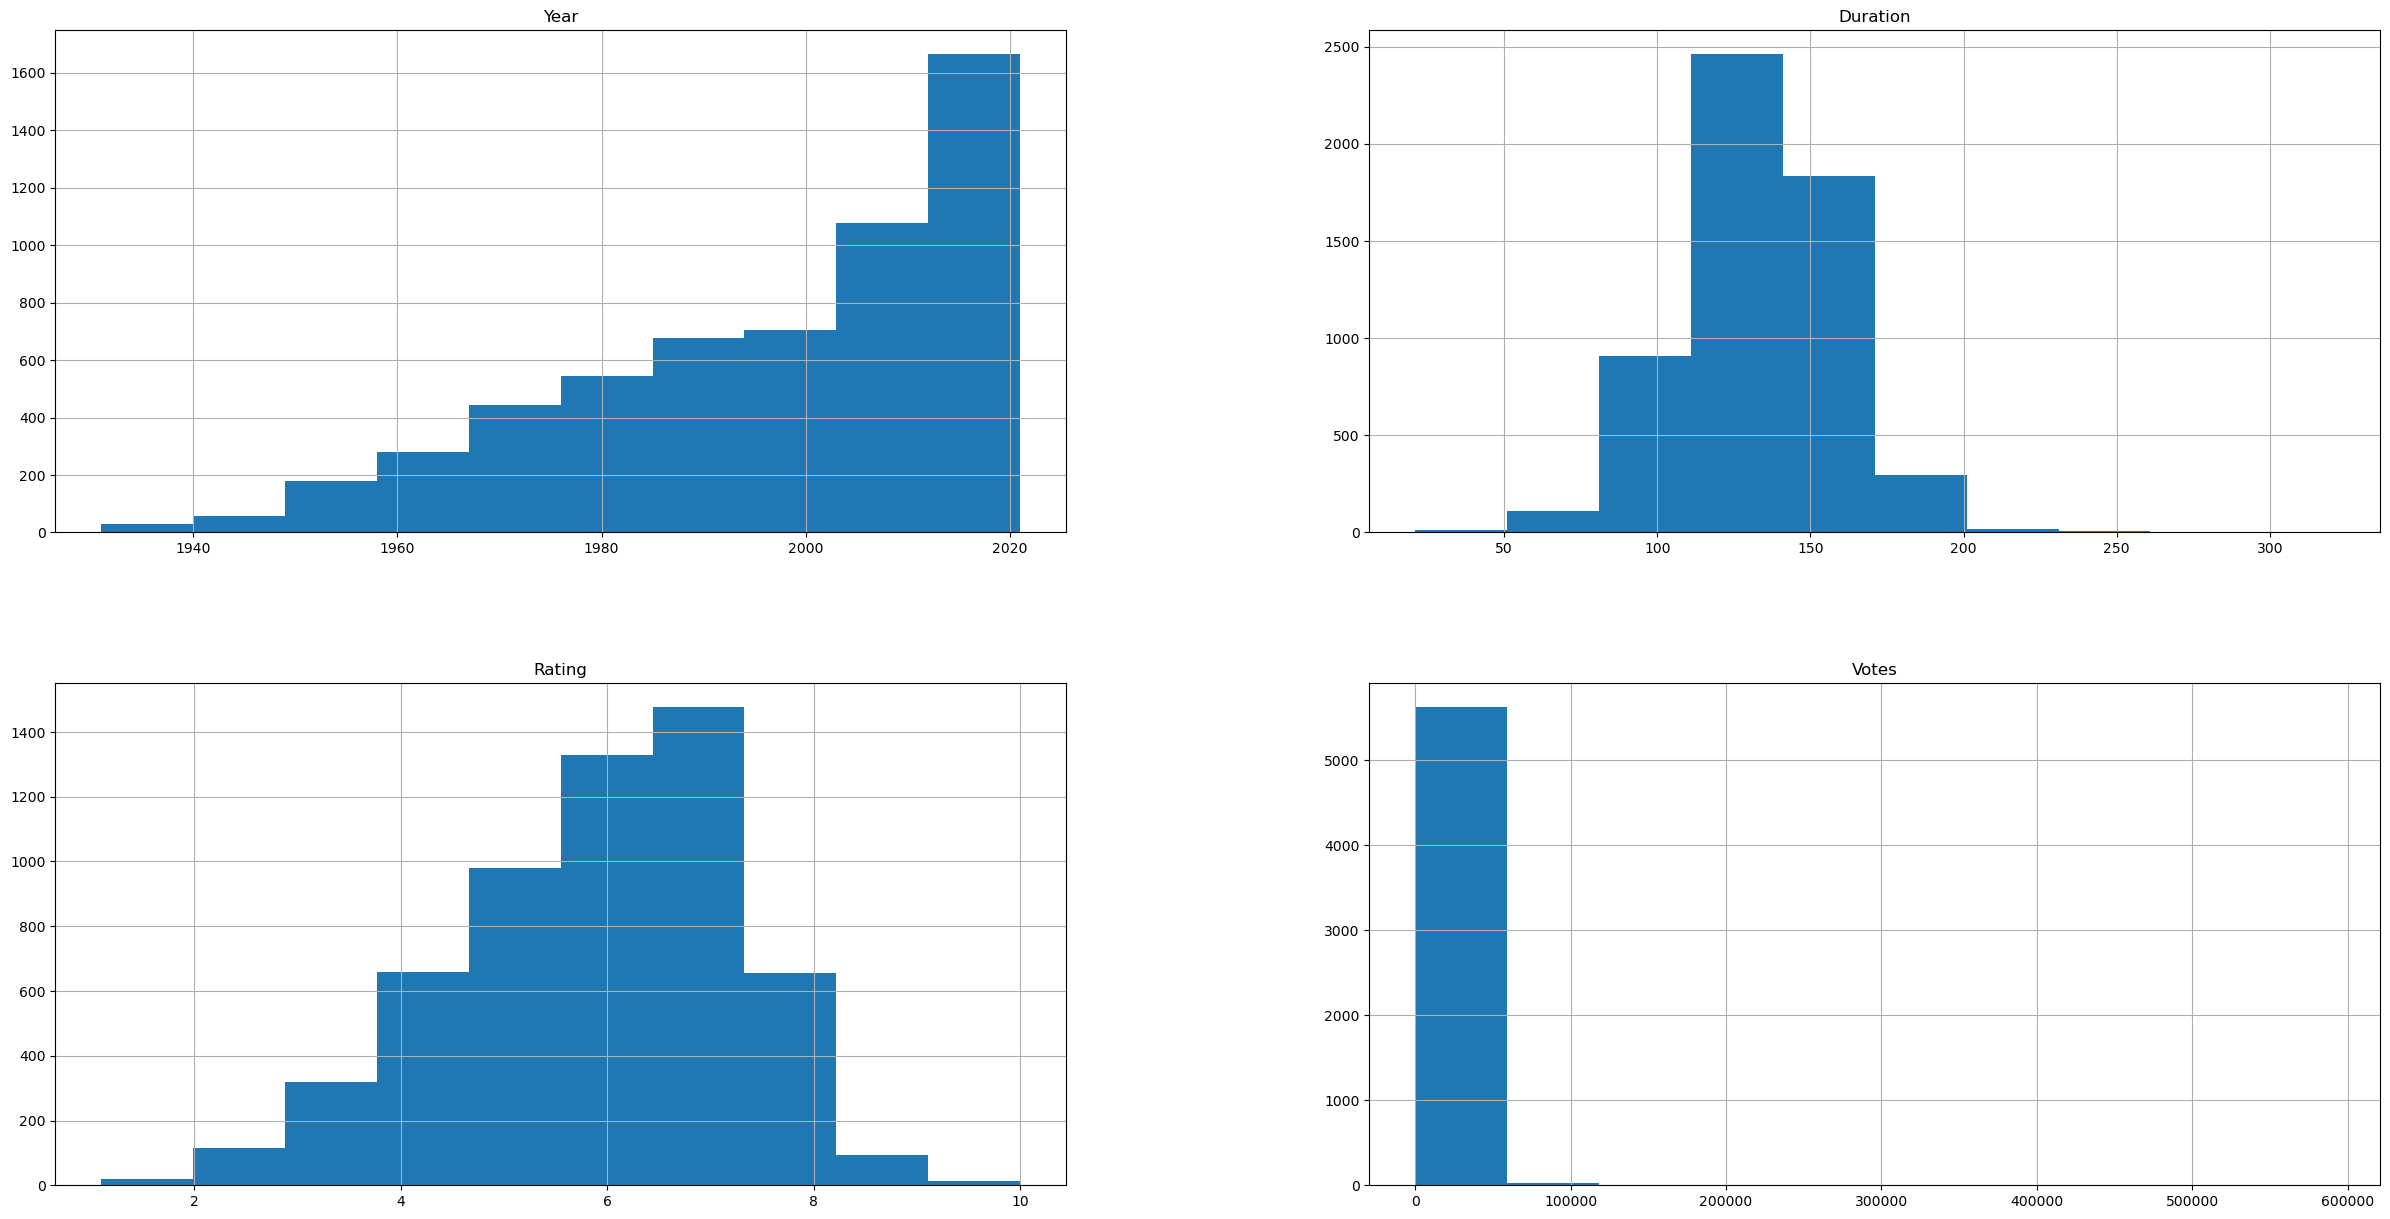

In [84]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
sns.boxplot(x='Votes',data=df)

plt.subplot(2,2,2)
sns.histplot(df['Year'],color='g')

plt.subplot(2,2,3)
sns.histplot(df['Rating'],color='g')

plt.subplot(2,2,4)
sns.scatterplot(x=df['Duration'], y=df['Rating'], data=df)

plt.tight_layout()
plt.show()
df.hist(figsize=(30, 15))

LinearRegression Model

In [85]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [86]:
#Assuming features and target variables
X = df[['Year','Duration','Votes']]
y = df['Rating']

In [87]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [88]:
#create a linear regression model
model=LinearRegression()

In [89]:
model.fit(X_train, y_train)

LinearRegression()

In [90]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 1.06
Root Mean Square Error (RMSE): 1.31


DecisionTreeRegressor Model

In [91]:
from sklearn.tree import DecisionTreeRegressor

In [92]:
# Create a Decision Tree Regressor model
decision_tree_model = DecisionTreeRegressor(random_state=42)

In [93]:
# Train the model on the training data
decision_tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [94]:
# Make predictions on the test set
y_pred_decision_tree = decision_tree_model.predict(X_test)

In [95]:
# Calculate MAE and RMSE for the Decision Tree model
mae_decision_tree = mean_absolute_error(y_test, y_pred_decision_tree)
rmse_decision_tree = np.sqrt(mean_squared_error(y_test, y_pred_decision_tree))

print("Decision Tree Regressor:")
print(f"Mean Absolute Error (MAE): {mae_decision_tree:.2f}")
print(f"Root Mean Square Error (RMSE): {rmse_decision_tree:.2f}")

Decision Tree Regressor:
Mean Absolute Error (MAE): 1.24
Root Mean Square Error (RMSE): 1.65


RandomForestRegressor Model

In [96]:
from sklearn.ensemble import RandomForestRegressor

In [97]:
# Create a Random Forest Regressor model
random_forest_model = RandomForestRegressor(random_state=42)

In [98]:
# Train the model on the training data
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [99]:
# Make predictions on the test set
y_pred_random_forest = random_forest_model.predict(X_test)

In [100]:
# Calculate MAE and RMSE for the Random Forest model
mae_random_forest = mean_absolute_error(y_test, y_pred_random_forest)
rmse_random_forest = np.sqrt(mean_squared_error(y_test, y_pred_random_forest))

print("Random Forest Regressor:")
print(f"Mean Absolute Error (MAE): {mae_random_forest:.2f}")
print(f"Root Mean Square Error (RMSE): {rmse_random_forest:.2f}")


Random Forest Regressor:
Mean Absolute Error (MAE): 0.92
Root Mean Square Error (RMSE): 1.22


Linear Regression:

    MAE: 1.06
    RMSE: 1.31

Decision Tree Regressor:

    MAE:  1.24
    RMSE: 1.65

Random Forest Regressor:

    MAE: 0.92
    RMSE: 1.22
    
In this situation, the Random Forest Regressor did the best among the three models. It has the smallest MAE (0.92) and a pretty good RMSE (1.22), showing that it made the most accurate predictions compared to the other models. So, according to these numbers, the Random Forest Regressor is the best choice for predicting ratings in this particular dataset